Script to create noisy arteficial data 

In [15]:
# import libaries 
import numpy as np
import torch
from scipy.integrate import odeint

In [16]:
def equation(y, t):
    #the equation is A <-> B+C and C<->D
    cA,cB,cC,cD=y  #array of concentrations
   

    k1 = 1    # kinetic constants of the chemical reactions
    k2 = 0.5
    k3 = 3
    k4 = 2


    dA_dt = - k1 * cA + k2 * cB * cC                             #dA/dt
    dB_dt = + k1 * cA - k2 * cB * cC                             #dB/dt
    dC_dt = + k1 * cA - k2 * cB * cC - k3 * cC + k4 * cD         #dC/dt
    dD_dt = + k3 * cC - k4 * cD                                  #dD/dt

    return [dA_dt, dB_dt, dC_dt, dD_dt]



In [17]:
y0 = [1., 0., 0., 0.] #initial concentrations
t = np.linspace(0, 10, 101)         #time
Conc= odeint(equation, y0,t)

/tmp/ipykernel_3263/1446810986.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


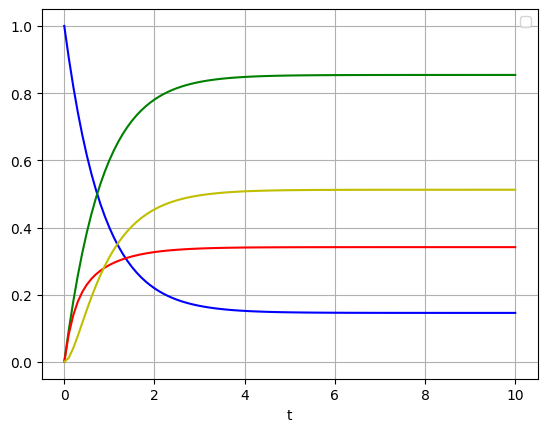

In [18]:
import matplotlib.pyplot as plt
plt.plot(t, Conc[:, 0], 'b')
plt.plot(t, Conc[:, 1], 'g')
plt.plot(t, Conc[:, 2], 'r')
plt.plot(t, Conc[:, 3], 'y')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [22]:
#Add noise
noise_std=0.05
num_points=(101,4)
Conc_noise = Conc + np.random.normal(0, noise_std,num_points)



/tmp/ipykernel_3263/4024122037.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


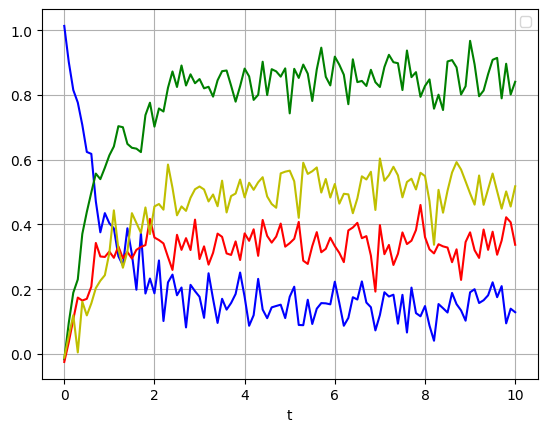

In [23]:
plt.plot(t, Conc_noise[:, 0], 'b')
plt.plot(t, Conc_noise[:, 1], 'g')
plt.plot(t, Conc_noise[:, 2], 'r')
plt.plot(t, Conc_noise[:, 3], 'y')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [21]:
# save as csv file
import pandas as pd
df=pd.DataFrame
df_final=df({'time': t, 'ConcA': Conc_noise[:, 0], 'ConcB': Conc_noise[:, 1], 'ConcC': Conc_noise[:, 2], 'ConcD': Conc_noise[:, 3]} )
print (df_final)

output_file = "/workspaces/bio-pinn/Arteficial Data/Data_noisy.csv"
df_final.to_csv(output_file, index=False)

print(f"Daten erfolgreich erweitert und in {output_file} gespeichert.")

     time     ConcA     ConcB     ConcC     ConcD
0     0.0  0.245877  0.223233  0.171973  0.413822
1     0.1  1.443981  0.572754  0.122091 -0.068460
2     0.2  0.306704  0.541459 -0.778606  0.200669
3     0.3  1.308709  0.293100  0.618100  0.752142
4     0.4  0.152425  0.016914  0.618124 -0.095291
..    ...       ...       ...       ...       ...
96    9.6 -0.411684  0.441290  1.133967 -0.142704
97    9.7 -0.568529  1.551015  1.505932  0.845242
98    9.8  0.207164  0.558967  0.828947  1.389309
99    9.9  0.107978 -0.754604 -0.658183  0.440524
100  10.0  0.742666  0.625334 -0.096707  0.237212

[101 rows x 5 columns]
Daten erfolgreich erweitert und in /workspaces/bio-pinn/Arteficial Data/Data_noisy.csv gespeichert.
